In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import glob
import re
import stan
import arviz as az

In [2]:
p_1_files = glob.glob(f'data_2016/*_0_*.csv')
p_2_files = glob.glob(f'data_2016/*_1_*.csv')
p_3_files = glob.glob(f'data_2016/*_2_*.csv')
p_4_files = glob.glob(f'data_2016/*_3_*.csv')
p_5_files = glob.glob(f'data_2016/*_4_*.csv')
p_6_files = glob.glob(f'data_2016/*_5_*.csv')
p_7_files = glob.glob(f'data_2016/*_6_*.csv')
p_8_files = glob.glob(f'data_2016/*_7_*.csv')
p_9_files = glob.glob(f'data_2016/*_8_*.csv')
p_10_files = glob.glob(f'data_2016/*_9_*.csv')

print(len(p_1_files))
print(len(p_2_files))
print(len(p_3_files))
print(len(p_4_files))
print(len(p_5_files))
print(len(p_6_files))
print(len(p_7_files))
print(len(p_8_files))
print(len(p_9_files))
print(len(p_10_files))

346
357
352
339
273
264
335
361
359
357


In [4]:
dfs_p1 = [pd.read_csv(filename) for filename in p_1_files]
dfs_p2 = [pd.read_csv(filename) for filename in p_2_files]
dfs_p3 = [pd.read_csv(filename) for filename in p_3_files]
dfs_p4 = [pd.read_csv(filename) for filename in p_4_files]
dfs_p5 = [pd.read_csv(filename) for filename in p_5_files]
dfs_p6 = [pd.read_csv(filename) for filename in p_6_files]
dfs_p7 = [pd.read_csv(filename) for filename in p_7_files]
dfs_p8 = [pd.read_csv(filename) for filename in p_8_files]
dfs_p9 = [pd.read_csv(filename) for filename in p_9_files]
dfs_p10 = [pd.read_csv(filename) for filename in p_10_files]

big_frame_p1 = pd.concat(dfs_p1, ignore_index=True)
big_frame_p2 = pd.concat(dfs_p2, ignore_index=True)
big_frame_p3 = pd.concat(dfs_p3, ignore_index=True)
big_frame_p4 = pd.concat(dfs_p4, ignore_index=True)
big_frame_p5 = pd.concat(dfs_p5, ignore_index=True)
big_frame_p6 = pd.concat(dfs_p6, ignore_index=True)
big_frame_p7 = pd.concat(dfs_p7, ignore_index=True)
big_frame_p8 = pd.concat(dfs_p8, ignore_index=True)
big_frame_p9 = pd.concat(dfs_p9, ignore_index=True)
big_frame_p10 = pd.concat(dfs_p10, ignore_index=True)

big_frame_list = [big_frame_p1, big_frame_p2, big_frame_p3, 
                     big_frame_p4, big_frame_p5, big_frame_p6, 
                     big_frame_p7, big_frame_p8, big_frame_p9, 
                     big_frame_p10]

In [12]:
ratio_RR_RI_response_list = []
for df in big_frame_list:
    resp_RI = df["resp_RI"]
    resp_RR = df["resp_RR"]

    ratio_RR_RI_response = np.log2(resp_RR.sum()/resp_RI.sum())    
    ratio_RR_RI_response_list.append(ratio_RR_RI_response)


print(ratio_RR_RI_response_list)

[1.4619868477788431, 1.5905130349457728, 1.6155857154233588, 1.6200886769611635, 1.5437840552907542, 1.730539612970746, 1.7073817968127976, 1.6887926904662416, 1.568450073397531, 1.374010884176483]


In [11]:
ratio_RR_RI_reward_list = []
for df in big_frame_list:
    reward_RI = df["reward_RI"]
    reward_RR = df["reward_RR"]

    ratio_RR_RI_reward = np.log2(reward_RR.sum()/( reward_RI.sum()))
    ratio_RR_RI_reward_list.append(ratio_RR_RI_reward)

print(ratio_RR_RI_reward_list)

[-0.32830922034052584, 0.2984898033852968, 0.8768978091349405, 1.5792937506344642, 2.070389327891398, 2.3179970432974475, 1.5861111433303117, 1.1007081198087694, 0.7219819798294462, -0.37550913509220635]


# Response

In [15]:
log_ratio_RR_RI_response_list = ratio_RR_RI_response_list
log_ratio_RR_RI_reward_list = ratio_RR_RI_reward_list

X = np.array(log_ratio_RR_RI_reward_list).reshape(-1, 1)
y = np.array(log_ratio_RR_RI_response_list)

reg = LinearRegression().fit(X, y)
sen = reg.coef_[0]
bias = np.exp2(reg.intercept_)

print(f"Sensitivity \n{sen:0.4f}")
print(f"Bias \n{bias:0.04f}")

Sensitivity 
0.0898
Bias 
2.8317


# Time

In [9]:
def get_times(l):
    visit_time = []
    for i in range(len(l)):

        if l[i] > l[i-1] and l[i+1] == 0:
            visit_time.append(l[i])
    
    return visit_time

In [10]:
list_times = []
list_rewards = []
count = 1

for df in big_frame_list:
    time_RI = df["visit_lenght_time_RI"].to_numpy()
    time_RR = df["visit_lenght_time_RR"].to_numpy()

    time_RI = np.append(time_RI, 0)
    time_RR = np.append(time_RR, 0)

    reward_RI_time = df["reward_RI"].to_numpy()
    reward_RR_time = df["reward_RR"].to_numpy()

    time_visit_RI = get_times(time_RI)
    time_visit_RR = get_times(time_RR)

    ratio_RR_RI_time = np.log2(np.sum(time_visit_RR)/np.sum(time_visit_RI))
    ratio_RR_RI_time_reward = np.log2(np.sum(reward_RR_time)/np.sum(reward_RI_time))

    list_times.append(ratio_RR_RI_time)
    list_rewards.append(ratio_RR_RI_time_reward)

    count += 1

list_times = np.array(list_times)
list_rewards = np.array(list_rewards)

print(list_times)
print(list_rewards)

[-0.05817758  0.33735148  0.47643611  0.88342949  0.30995139 -0.05431663
  1.59532485  1.39446237  0.82320476  0.70333235]
[-0.32830922  0.2984898   0.87689781  1.57929375  2.07038933  2.31799704
  1.58611114  1.10070812  0.72198198 -0.37550914]


In [13]:
X = list_rewards.reshape(-1, 1)
y = list_times

reg = LinearRegression().fit(X, y)
sen_t = reg.coef_[0]
bias_t = np.exp2(reg.intercept_)

print(f"Sensitivity, s: {sen_t:0.4f}")
print(f"Log-Bias, b: {bias_t:0.04f}")

Sensitivity, s: 0.0679
Log-Bias, b: 1.4889


In [16]:
# File to save
!mkdir Figures_2016
dir = 'Figures_2016/'

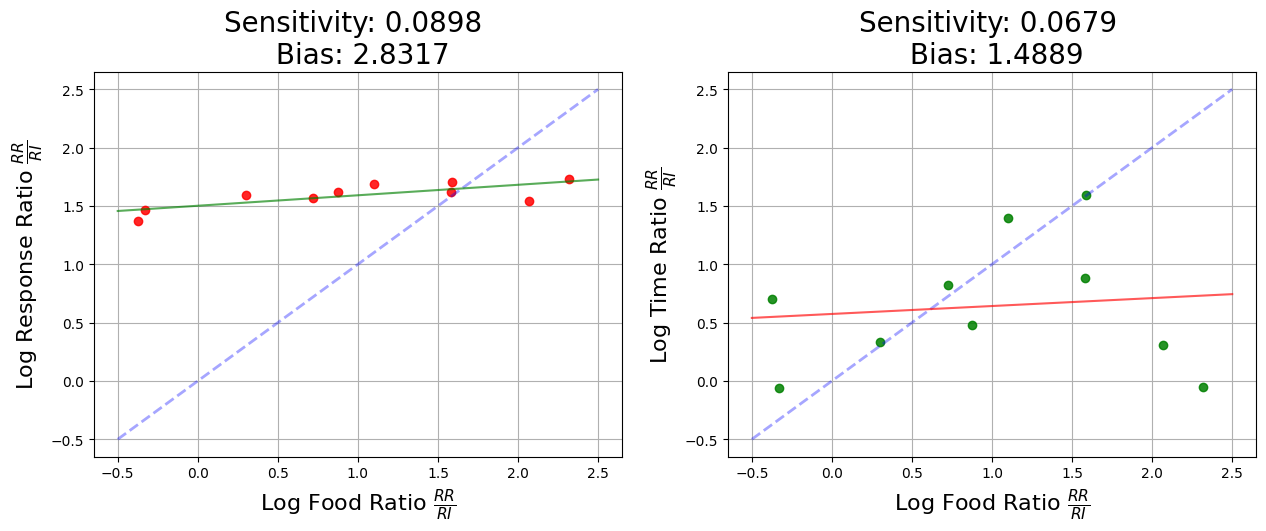

In [22]:
# Plot the Log food ratio vs Log response ratio  and log food ratio vs log time ratio and the
# estimated sensitivity and bias from the generalized matching law
x = np.linspace(-0.5,2.5,100)
fig, ax = plt.subplots(figsize = (15, 5), ncols=2, nrows=1)

ax[0].plot(log_ratio_RR_RI_reward_list, log_ratio_RR_RI_response_list, 'o', alpha = 0.85, color = 'red')
ax[0].plot(x, x, '--', alpha = 0.35, color = 'blue', lw = 2)
ax[0].plot(x, x*sen + np.log2(bias), '-', alpha = 0.65, color = 'green', lw = 1.5)
ax[0].grid()
ax[0].set_xlabel(r'Log Food Ratio $\frac{RR}{RI}$', fontsize=16)
ax[0].set_ylabel(r'Log Response Ratio $\frac{RR}{RI}$', fontsize=16)
ax[0].set_title(f"Sensitivity: {sen:0.4f} \n Bias: {bias:0.04f}", fontsize=20)

ax[1].plot(list_rewards, list_times, 'o', alpha = 0.85, color = 'green')
ax[1].plot(x, x, '--', alpha = 0.35, color = 'blue', lw = 2)
ax[1].plot(x, x*sen_t + np.log2(bias_t), '-', alpha = 0.65, 
           color = 'red', lw = 1.5)
ax[1].grid()
ax[1].set_xlabel(r'Log Food Ratio $\frac{RR}{RI}$', fontsize=16)
ax[1].set_ylabel(r'Log Time Ratio $\frac{RR}{RI}$', fontsize=16)
ax[1].set_title(f"Sensitivity: {sen_t:0.4f} \n Bias: {bias_t:0.04f}", fontsize=20)

plt.savefig(dir + 'Matching_2016.png', dpi = 450, bbox_inches='tight', pad_inches=0.1)
plt.show()